In [1]:
%pip install -q keras-nightly
%pip install tensorflow tensorflow-gpu pandas matplotlib sklearn
%pip list

Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Admin\Downloads\graduation_project\scripts\venv\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\Admin\Downloads\graduation_project\scripts\venv\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\Admin\Downloads\graduation_project\scripts\venv\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer

Package                 Version
----------------------- -------------------
absl-py                 2.1.0
annotated-types         0.7.0
anyio                   4.3.0
APScheduler             3.10.4
asttokens               2.4.1
astunparse              1.6.3
certifi                 2024.2.2
chardet                 3.0.4
charset-normalizer      3.3.2
click                   8.1.7
colorama                0.4.6
comm                    0.2.2
debugpy                 1.8.1
decorator               5.1.1
dnspython               2.6.1
email_validator         2.1.1
executing               2.0.1
fastapi                 0.111.0
fastapi-cli             0.0.4
flatbuffers             24.3.25
gast                    0.5.4
google-pasta            0.2.0
googletrans             4.0.0rc1
grpcio                  1.64.0
h11                     0.9.0
h2                      3.2.0
h5py                    3.11.0
hpack                   3.0.0
hstspreload             2024.5.1
httpcore                0.9.1
httptool

In [15]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import pandas as pd
import tensorflow as tf
import numpy as np
import keras

In [16]:
df = pd.read_csv('../jigsaw-toxic-comment-classification-challenge/train.csv/train.csv')

In [17]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [18]:
from keras.layers import TextVectorization

In [19]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [9]:
X.values

array(["Explanation\r\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \r\n\r\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\r\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of 

In [20]:
MAX_FEATURES = 200000

In [21]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [22]:
vectorizer.adapt(X.values)

In [24]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([645,   0,   0,   0,   0], dtype=int64)>

In [25]:
vectorized_text = vectorizer(X.values)

In [11]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [12]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [13]:
batch_X, batch_y =  dataset.as_numpy_iterator().next()

In [15]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [16]:
train_g = train.as_numpy_iterator()

In [17]:
train_g.next()

(array([[  312,    27,   213, ...,     0,     0,     0],
        [  534,    98, 44964, ...,     0,     0,     0],
        [   20,     7,   492, ...,     0,     0,     0],
        ...,
        [   14,   266,     6, ...,     0,     0,     0],
        [  555,     7,    20, ...,     0,     0,     0],
        [ 2123,   319,   298, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [19]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3633s 520ms/step - accuracy: 0.9758 - loss: 0.0821 - val_accuracy: 0.9939 - val_loss: 0.0474
Epoch 2/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3914s 561ms/step - accuracy: 0.9818 - loss: 0.0461 - val_accuracy: 0.9943 - val_loss: 0.0381
Epoch 3/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3904s 559ms/step - accuracy: 0.9938 - loss: 0.0404 - val_accuracy: 0.9939 - val_loss: 0.0341
Epoch 4/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 3857s 553ms/step - accuracy: 0.9930 - loss: 0.0357 - val_accuracy: 0.9938 - val_loss: 0.0318
Epoch 5/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 16629s 2s/step - accuracy: 0.9934 - loss: 0.0317 - val_accuracy: 0.9935 - val_loss: 0.0286


In [ ]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

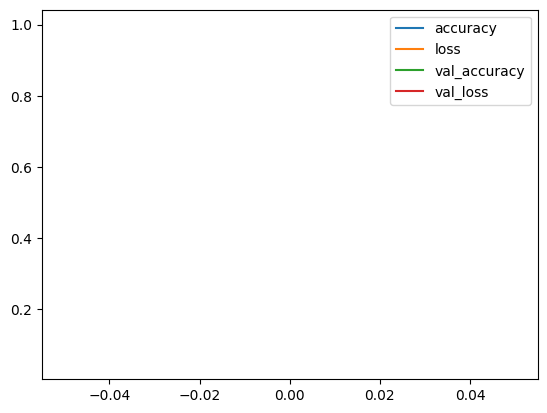

In [29]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [23]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [24]:
res = model.predict(np.array([input_text]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


In [25]:
res

array([[0.9978267 , 0.18273753, 0.97047585, 0.03241322, 0.9120813 ,
        0.12815455]], dtype=float32)

In [26]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [27]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [28]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [29]:
res.shape

(1, 6)

# 4. Evaluate Model

In [30]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [33]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8618963360786438, Recall:0.8301191329956055, Accuracy:0.5165496468544006


# 5. Test and Gradio

In [34]:
import keras
import tensorflow as tf

In [35]:
model1= model

In [36]:
model1

<Sequential name=sequential, built=True>

In [35]:
tf.saved_model.save(model, 'toxicity2')

INFO:tensorflow:Assets written to: toxicity1\assets


INFO:tensorflow:Assets written to: toxicity1\assets


In [27]:
input_str = vectorizer('Fucking your ass, bitch!')

In [37]:
model.predict(np.expand_dims(input_str,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[0.99999434, 0.51738334, 0.99980175, 0.00972021, 0.9760282 ,
        0.07040619]], dtype=float32)

In [26]:
loaded_model = keras.layers.TFSMLayer("toxicity1", call_endpoint="serving_default")

In [28]:
input_tensor = np.expand_dims(input_str, 0).astype(np.float32)
prediction = (loaded_model(input_tensor)['output_0'].numpy() > 0.5).astype(int)

In [29]:
prediction

array([[1, 1, 1, 0, 1, 0]])

In [ ]:
loaded_model(np.expand_dims(input_str,0))['output_0'].numpy()

In [59]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

In [60]:
print("Training loss:", history.history['loss'])
print("Training accuracy:", history.history['accuracy'])
print("Validation loss:", history.history['val_loss'])
print("Validation accuracy:", history.history['val_accuracy'])

Training loss: [0.07140100747346878]
Training accuracy: [0.9721428751945496]
Validation loss: [0.04928025230765343]
Validation accuracy: [0.9947500228881836]


# 6. Train continute with new data

In [143]:
import tensorflow as tf

In [141]:
# h1 = tf.saved_model.load('toxicity')

# # Trích xuất biến của mô hình
# h2 = h1.signatures['serving_default']
# h2(inputs=np.expand_dims(input_str,0))['output_0'].numpy()

In [71]:
y_new = (loaded_model(np.expand_dims(input_str,0))['output_0'].numpy() > 0.5).astype(int)

In [81]:
vectorized_text_new = vectorizer(['hey i freaken hate you!'])

In [125]:
X = df['comment_text'].values
y = df[df.columns[2:]].values
# print(X[0])
print(y)
print(y_new) # checked
print(vectorized_text)
print(vectorized_text_new)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[1 0 0 0 0 0]]
tf.Tensor(
[[   657     75      2 ...      0      0      0]
 [139272     54   2529 ...      0      0      0]
 [   393    433     70 ...      0      0      0]
 ...
 [   147    230    238 ...      0      0      0]
 [    15    514      3 ...      0      0      0]
 [   124      7     13 ...      0      0      0]], shape=(79998, 1800), dtype=int64)
tf.Tensor([[393   8   1 ...   0   0   0]], shape=(1, 1800), dtype=int64)


In [126]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
y_new = tf.cast(y_new, tf.int64)
dataset_new = tf.data.Dataset.from_tensor_slices((vectorized_text_new, y_new))
dataset_new = dataset_new.cache()
dataset_new = dataset_new.shuffle(160000)
dataset_new = dataset_new.batch(16)
dataset_new = dataset_new.prefetch(8) # helps bottlenecks

In [128]:
train_new = dataset_new.take(int(len(dataset_new)*.7))
val_new = dataset_new.skip(int(len(dataset_new)*.7)).take(int(len(dataset_new)*.2))

In [170]:
new_model = tf.keras.Sequential([
    loaded_model,
    tf.keras.layers.Embedding(MAX_FEATURES+1, 32),
    tf.keras.layers.Bidirectional(LSTM(32, activation='tanh')),
     tf.keras.layers.Dense(128, activation='relu'),  # Thêm lớp dense mới
    tf.keras.layers.Dense(256, activation='relu'),  # Thêm lớp dense mới
    tf.keras.layers.Dense(128, activation='relu'),  # Thêm lớp dense mới
    tf.keras.layers.Dense(6, activation='sigmoid')  # Thêm lớp dense mới cho đầu ra
])

In [ ]:
new_model.set_weights(loaded_model.get_weights())

In [155]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
new_model.summary()

In [ ]:
history1 = new_model.fit(train_new, epochs=1, validation_data=val_new)

In [172]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1
Keras version: 3.2.0.dev2024040503
